# 10 minutes to pypolars
This as short introduction to Polars to get you started with the basic concepts of data wrangling. It is very much influenced by [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html).

Pypolars are the python bindings to Polars. It currently supports only a subset of the datatypes and operations supported by Polars. 
However it should be enough to give your slow pipelines a boost.

In [1]:
import pypolars as pl
import numpy as np
np.random.seed(1)

# Object creation

Creating a `Series` by passing a list or array of values.

In [2]:
pl.Series("a", [1, 2, 3])

Series: 'a' [i64]
[
	1
	2
	3
]

A `Series` can also have nullable values.

In [3]:
s = pl.Series("with nullable values", [1, None, 3], nullable=True)
s

Series: 'with nullable values' [i64]
[
	1
	null
	3
]

Series have a data type and can be casted

In [4]:
print(s.dtype)
s.cast_f32()

i64


Series: 'with nullable values' [f32]
[
	1
	null
	3
]

A `DataFrame` can be created by passing a dictionary with keys as column names and 
list values.

In [5]:
df = pl.DataFrame({
    "foo": np.random.rand(10),
    "bar": np.arange(10),
    "ham": ["h"] * 3 + ["a"] * 3 + ["m"] * 4
})
df.head(3)

+-------+-----+-----+
| foo   | bar | ham |
| ---   | --- | --- |
| f64   | i64 | str |
+=======+=====+=====+
| 0.417 | 0   | "h" |
+-------+-----+-----+
| 0.72  | 1   | "h" |
+-------+-----+-----+
| 0e0   | 2   | "h" |
+-------+-----+-----+

The columns of the result `DataFrame` have different types and names

In [6]:
print(df.dtypes)
print(df.columns)

['f64', 'i64', 'str']
['foo', 'bar', 'ham']


# Viewing data

We can view the top and bottom rows of a `DataFrame`

In [7]:
df.head(3)

+-------+-----+-----+
| foo   | bar | ham |
| ---   | --- | --- |
| f64   | i64 | str |
+=======+=====+=====+
| 0.417 | 0   | "h" |
+-------+-----+-----+
| 0.72  | 1   | "h" |
+-------+-----+-----+
| 0e0   | 2   | "h" |
+-------+-----+-----+

In [8]:
df.tail(3)

+-------+-----+-----+
| foo   | bar | ham |
| ---   | --- | --- |
| f64   | i64 | str |
+=======+=====+=====+
| 0.346 | 7   | "m" |
+-------+-----+-----+
| 0.397 | 8   | "m" |
+-------+-----+-----+
| 0.539 | 9   | "m" |
+-------+-----+-----+

We can sort by column.

In [9]:
df.sort("foo", reverse=True).head(5)

+-------+-----+-----+
| foo   | bar | ham |
| ---   | --- | --- |
| f64   | i64 | str |
+=======+=====+=====+
| 0.72  | 1   | "h" |
+-------+-----+-----+
| 0.539 | 9   | "m" |
+-------+-----+-----+
| 0.417 | 0   | "h" |
+-------+-----+-----+
| 0.397 | 8   | "m" |
+-------+-----+-----+
| 0.346 | 7   | "m" |
+-------+-----+-----+

# Selection
We can select a single column, which returns a Series.

In [10]:
df["foo"].head(3)

Series: 'foo' [f64]
[
	0.417
	0.72
	0e0
]

Or select a column by index

In [11]:
df[0]

Series: 'foo' [f64]
[
	0.417
	0.72
	0e0
	0.302
	0.147
	0.092
	0.186
	0.346
	0.397
	0.539
]

When we select in two dimensions, we select by row, column order.
Here we slice until the third row of the first column.

In [12]:
df[:3, 0]

Series: 'foo' [f64]
[
	0.417
	0.72
	0e0
]

Or we can slice the whole `DataFrame` into a smaller sub `DataFrame`

In [13]:
df[:4]

+-------+-----+-----+
| foo   | bar | ham |
| ---   | --- | --- |
| f64   | i64 | str |
+=======+=====+=====+
| 0.417 | 0   | "h" |
+-------+-----+-----+
| 0.72  | 1   | "h" |
+-------+-----+-----+
| 0e0   | 2   | "h" |
+-------+-----+-----+
| 0.302 | 3   | "a" |
+-------+-----+-----+

Or we slice both rows and columns

In [14]:
df[3:5,1:]

+-----+-----+
| bar | ham |
| --- | --- |
| i64 | str |
+=====+=====+
| 3   | "a" |
+-----+-----+
| 4   | "a" |
+-----+-----+

# Boolean indexing
Boolean indexes can be used to filter data.

In [15]:
df[df["foo"] > 0.5]

+-------+-----+-----+
| foo   | bar | ham |
| ---   | --- | --- |
| f64   | i64 | str |
+=======+=====+=====+
| 0.72  | 1   | "h" |
+-------+-----+-----+
| 0.539 | 9   | "m" |
+-------+-----+-----+

In [16]:
df[df["ham"] == "a"]

+-------+-----+-----+
| foo   | bar | ham |
| ---   | --- | --- |
| f64   | i64 | str |
+=======+=====+=====+
| 0.302 | 3   | "a" |
+-------+-----+-----+
| 0.147 | 4   | "a" |
+-------+-----+-----+
| 0.092 | 5   | "a" |
+-------+-----+-----+

# Setting
Adding a new column to the `DataFrame` can be done with `hstack`.

In [17]:
df["new"] = np.arange(10)
df

+-------+-----+-----+-----+
| foo   | bar | ham | new |
| ---   | --- | --- | --- |
| f64   | i64 | str | i64 |
+=======+=====+=====+=====+
| 0.417 | 0   | "h" | 0   |
+-------+-----+-----+-----+
| 0.72  | 1   | "h" | 1   |
+-------+-----+-----+-----+
| 0e0   | 2   | "h" | 2   |
+-------+-----+-----+-----+
| 0.302 | 3   | "a" | 3   |
+-------+-----+-----+-----+
| 0.147 | 4   | "a" | 4   |
+-------+-----+-----+-----+
| 0.092 | 5   | "a" | 5   |
+-------+-----+-----+-----+
| 0.186 | 6   | "m" | 6   |
+-------+-----+-----+-----+
| 0.346 | 7   | "m" | 7   |
+-------+-----+-----+-----+
| 0.397 | 8   | "m" | 8   |
+-------+-----+-----+-----+
| 0.539 | 9   | "m" | 9   |
+-------+-----+-----+-----+

We can also define the column location by index

In [18]:
df[0] = pl.Series("new_foo", np.random.rand(10))
df.head(3)

+---------+-----+-----+-----+
| new_foo | bar | ham | new |
| ---     | --- | --- | --- |
| f64     | i64 | str | i64 |
+=========+=====+=====+=====+
| 0.419   | 0   | "h" | 0   |
+---------+-----+-----+-----+
| 0.685   | 1   | "h" | 1   |
+---------+-----+-----+-----+
| 0.204   | 2   | "h" | 2   |
+---------+-----+-----+-----+

Or use a boolean mask to assign new values.

_Note that every mutable assignment alocates new memory. So isn't actually mutable with regard to the actual memory. This is a performance trade off. Due to the immutable memory, slices, clones, subsets of `Series`/`DataFrames` are zero copy. If you need to mutate a lot of values, it's faster to do this in numpy allocate a new `Series`._

In [19]:
# selection order is row column
df[df["new_foo"] > 0.5, "new_foo"] = 1

we can also define the mutation location by passing an array of indexes

In [20]:
s = df["ham"]
s[[1, 2, 3]] = "c"
s

Series: 'ham' [str]
[
	"h"
	"c"
	"c"
	"c"
	"a"
	"a"
	"m"
	"m"
	"m"
	"m"
]

# Concat
Polars provide methods to cobine multiple `DataFrames` and `Series`.
We can concatenate a `DataFrame` with `hstack`.

In [21]:
# clones are super cheap!
df1 = df.clone()
df1.hstack(df.get_columns())
df1.head()

+---------+-----+-----+-----+---------+-----+-----+-----+
| new_foo | bar | ham | new | new_foo | bar | ham | new |
| ---     | --- | --- | --- | ---     | --- | --- | --- |
| f64     | i64 | str | i64 | f64     | i64 | str | i64 |
+=========+=====+=====+=====+=========+=====+=====+=====+
| 0.419   | 0   | "h" | 0   | 0.419   | 0   | "h" | 0   |
+---------+-----+-----+-----+---------+-----+-----+-----+
| 1       | 1   | "h" | 1   | 1       | 1   | "h" | 1   |
+---------+-----+-----+-----+---------+-----+-----+-----+
| 0.204   | 2   | "h" | 2   | 0.204   | 2   | "h" | 2   |
+---------+-----+-----+-----+---------+-----+-----+-----+
| 1       | 3   | "a" | 3   | 1       | 3   | "a" | 3   |
+---------+-----+-----+-----+---------+-----+-----+-----+
| 0.027   | 4   | "a" | 4   | 0.027   | 4   | "a" | 4   |
+---------+-----+-----+-----+---------+-----+-----+-----+

Or append rows from another `DataFrame`.

In [22]:
df1 = df.clone()
df1.vstack(df)
print(df.height, df1.height)

10 20


# Joins
SQL-styel joins.

In [23]:
left = pl.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pl.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

left.join(right, left_on="key", right_on="key", how="inner")

+-------+------+------+
| key   | lval | rval |
| ---   | ---  | ---  |
| str   | i64  | i64  |
+=======+======+======+
| "foo" | 1    | 4    |
+-------+------+------+
| "foo" | 2    | 4    |
+-------+------+------+
| "foo" | 1    | 5    |
+-------+------+------+
| "foo" | 2    | 5    |
+-------+------+------+

Another example that can be given is:

In [24]:
left = pl.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pl.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

left.join(right, left_on="key", right_on="key", how="inner")

+-------+------+------+
| key   | lval | rval |
| ---   | ---  | ---  |
| str   | i64  | i64  |
+=======+======+======+
| "foo" | 1    | 4    |
+-------+------+------+
| "bar" | 2    | 5    |
+-------+------+------+

# Grouping

By "group by" we are referring to a process involving one or more of the following steps:
* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

In [25]:
df = pl.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

+-------+---------+----------+----------+
| A     | B       | C        | D        |
| ---   | ---     | ---      | ---      |
| str   | str     | f64      | f64      |
+=======+=========+==========+==========+
| "foo" | "one"   | 1.134    | 0.902    |
+-------+---------+----------+----------+
| "bar" | "one"   | -1.1e0   | 0.502    |
+-------+---------+----------+----------+
| "foo" | "two"   | -1.72e-1 | 0.901    |
+-------+---------+----------+----------+
| "bar" | "three" | -8.78e-1 | -6.84e-1 |
+-------+---------+----------+----------+
| "foo" | "two"   | 0.042    | -1.23e-1 |
+-------+---------+----------+----------+
| "bar" | "two"   | 0.583    | -9.36e-1 |
+-------+---------+----------+----------+
| "foo" | "one"   | -1.101e0 | -2.68e-1 |
+-------+---------+----------+----------+
| "foo" | "three" | 1.145    | 0.53     |
+-------+---------+----------+----------+

In [26]:
df.groupby("A").select(["C", "D"]).sum()

+-------+----------+----------+
| A     | C_sum    | D_sum    |
| ---   | ---      | ---      |
| str   | f64      | f64      |
+=======+==========+==========+
| "foo" | 1.048    | 1.942    |
+-------+----------+----------+
| "bar" | -1.395e0 | -1.117e0 |
+-------+----------+----------+

In [27]:
df.groupby(["A", "B"]).select_all().first()

+-------+---------+---------+---------+----------+----------+
| A     | B       | A_first | B_first | C_first  | D_first  |
| ---   | ---     | ---     | ---     | ---      | ---      |
| str   | str     | str     | str     | f64      | f64      |
+=======+=========+=========+=========+==========+==========+
| "bar" | "three" | "bar"   | "three" | -8.78e-1 | -6.84e-1 |
+-------+---------+---------+---------+----------+----------+
| "foo" | "one"   | "foo"   | "one"   | 1.134    | 0.902    |
+-------+---------+---------+---------+----------+----------+
| "bar" | "two"   | "bar"   | "two"   | 0.583    | -9.36e-1 |
+-------+---------+---------+---------+----------+----------+
| "foo" | "three" | "foo"   | "three" | 1.145    | 0.53     |
+-------+---------+---------+---------+----------+----------+
| "bar" | "one"   | "bar"   | "one"   | -1.1e0   | 0.502    |
+-------+---------+---------+---------+----------+----------+
| "foo" | "two"   | "foo"   | "two"   | -1.72e-1 | 0.901    |
+-------

# Pivot tables

Pivots create a summary table by a applying a groupby and defining a pivot column and values to aggregate.

In [28]:
df = pl.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})

In [29]:
df.groupby("A").pivot(pivot_column="C", values_column="E").sum()

+---------+-------+----------+
| A       | foo   | bar      |
| ---     | ---   | ---      |
| str     | f64   | f64      |
+=========+=======+==========+
| "one"   | 1.245 | 1.939    |
+---------+-------+----------+
| "three" | 0.617 | -9.86e-1 |
+---------+-------+----------+
| "two"   | 0.171 | -1.143e0 |
+---------+-------+----------+

In [30]:
pivotted = df.groupby(["A", "B"]).pivot(pivot_column="C", values_column="E").sum()
pivotted

+---------+-----+----------+----------+
| A       | B   | foo      | bar      |
| ---     | --- | ---      | ---      |
| str     | str | f64      | f64      |
+=========+=====+==========+==========+
| "three" | "A" | null     | -6.37e-1 |
+---------+-----+----------+----------+
| "one"   | "C" | 0.3      | 2.1      |
+---------+-----+----------+----------+
| "two"   | "A" | 0.12     | null     |
+---------+-----+----------+----------+
| "one"   | "A" | -7.47e-1 | -3.52e-1 |
+---------+-----+----------+----------+
| "two"   | "C" | 0.051    | null     |
+---------+-----+----------+----------+
| "three" | "B" | 0.617    | null     |
+---------+-----+----------+----------+
| "one"   | "B" | 1.692    | 0.191    |
+---------+-----+----------+----------+
| "two"   | "B" | null     | -1.143e0 |
+---------+-----+----------+----------+
| "three" | "C" | null     | -3.49e-1 |
+---------+-----+----------+----------+

# Numpy interops

Polars has zero cost interaction with numpy's [ufunc](https://numpy.org/doc/stable/reference/ufuncs.html) functionality. This means that if a function/ method isn't supported by Polars, we can use numpy's without any overhead. Numpy will write the output to Polars/ arrow memory, and the null bitmask will keep null information.

In [31]:
s = pivotted["bar"]
np.cos(s)

Series: 'bar' [f64]
[
	0.804
	-5.05e-1
	null
	0.939
	null
	null
	0.982
	0.415
	0.94
]

In [32]:
np.exp(s)

Series: 'bar' [f64]
[
	0.529
	8.168
	null
	0.703
	null
	null
	1.21
	0.319
	0.705
]

# Clones
It was already mentioned previously, but clones are super cheap. This is due to the fact that the underlying memory backed by Polars is immutable. Slices and clones can be made with the guarantee that they will never be modified.

Below we observe that cloning an array of 1e6 elements is almost 850x faster. The cost of clone a Polars Series is also constant and doesn't increase with memory size. Ideal for writing pure funcitons. The cost of cloning a DataFrame 10x the size is also very small.

In [33]:
a = np.arange(int(1e6))

In [34]:
%%timeit
np.copy(a)

504 µs ± 20.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [35]:
s = pl.Series("a", a)

In [36]:
%%timeit
s.clone()

637 ns ± 22.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [37]:
df = pl.DataFrame({f"a_{i}": s.clone() for i in range(10)})
print(df.shape)
df.head(3)

(1000000, 10)


+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| a_0 | a_1 | a_2 | a_3 | a_4 | a_5 | a_6 | a_7 | a_8 | a_9 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| i64 | i64 | i64 | i64 | i64 | i64 | i64 | i64 | i64 | i64 |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
| 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 1   | 1   | 1   | 1   | 1   | 1   | 1   | 1   | 1   | 1   |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 2   | 2   | 2   | 2   | 2   | 2   | 2   | 2   | 2   | 2   |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+

In [38]:
%%timeit
df.clone()

1.52 µs ± 34.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


# Performance
Let's check some performances with Pandas. There is probably quite some FFI overhead that can be reduced. I expect bett

In [39]:
import pandas as pd
from pandas.util.testing import rands
import time
import matplotlib.pyplot as plt

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


In [40]:
def create_join_dfs(N = 10_000):
    left_pivot = int(0.8 * N)
    right_pivot = N - left_pivot

    indices = np.array([rands(10) for _ in range(N)], dtype="O")
    indices2 = np.array([rands(10) for _ in range(N)], dtype="O")
    key = np.tile(indices[:left_pivot], 10)
    key2 = np.tile(indices2[:left_pivot], 10)

    left = pd.DataFrame({"key": key, "key2": key2, "value": np.random.randn(len(key))})
    right = pd.DataFrame(
        {"key": indices[right_pivot:], "key2": indices2[right_pivot:], "value2": np.random.randn(left_pivot)}
    )
    return left, right
    
left, right = create_join_dfs()

In [41]:
def time_lambda(f: "fn() -> ()") -> float:
    """
    eval time in ms
    """
    t0 = time.time_ns() 
    for _ in range(10):
        f()
    return (time.time_ns() - t0) / 10 / 1e6

time_lambda(lambda : 1)
        

0.0001862

In [103]:
left_pl = []
left_pd = []
inner_pd = []
inner_pl = []
outer_pd = []
outer_pl = []
par_inner = []
par_left = []
n_proxy = []

for N in [10, 20, 30, 40, 50, 70, 100, 200, 500, 1000, 2000]:
    print(N)
    N *= 1000
    left, right = create_join_dfs(N)
    f_left_pd = lambda: left.merge(right, on="key", how="left")
    f_inner_pd = lambda: left.merge(right, on="key", how="inner")
    f_outer_pd = lambda: left.merge(right, on="key", how="outer")
    pd_left_t = time_lambda(f_left_pd)
    pd_inner_t = time_lambda(f_inner_pd)
    pd_outer_t = time_lambda(f_outer_pd)
    
    # create polars dfs
    left = pl.DataFrame(left.to_dict(orient="list"))
    right = pl.DataFrame(right.to_dict(orient="list"))
    f_left_pl = lambda: left.join(right, left_on="key", right_on="key", how="left")
    f_inner_pl = lambda: left.join(right, left_on="key", right_on="key", how="inner")
    f_outer_pl = lambda: left.join(right, left_on="key", right_on="key", how="outer")
    pl_left_t = time_lambda(f_left_pl)
    pl_inner_t = time_lambda(f_inner_pl)
    pl_outer_t = time_lambda(f_outer_pl)
    
    f_left_par = lambda: left.join(right, left_on="key", right_on="key", how="left", parallel=True)
    f_inner_par = lambda: left.join(right, left_on="key", right_on="key", how="inner", parallel=True)
    par_left_t = time_lambda(f_left_par)
    par_inner_t = time_lambda(f_inner_par)
    
    # pandas
    print("\tpandas")
    left_pd.append(pd_left_t)
    inner_pd.append(pd_inner_t)
    outer_pd.append(pd_outer_t)
    
    # polars
    print("\tpolars")
    left_pl.append(pl_left_t)
    inner_pl.append(pl_inner_t)
    outer_pl.append(pl_outer_t)
    
    # parallel polars
    par_left.append(par_left_t)
    par_inner.append(par_inner_t)
    n_proxy.append(N)
    del left
    del right
    


10
	pandas
	polars
20
	pandas
	polars
30
	pandas
	polars
40
	pandas
	polars
50
	pandas
	polars
70
	pandas
	polars
100
	pandas
	polars
200
	pandas
	polars
500
	pandas
	polars
1000
	pandas
	polars
2000
	pandas
	polars


In [109]:
def make_fig(how):
    plt.figure(figsize=(24, 6))
    if how == "inner":
        plt.plot(n_proxy, left_pd, label="pandas left")
        plt.plot(n_proxy, left_pl, label="polars left")
        plt.plot(n_proxy, par_left, label="polars left parallel")
    elif how == "outer":
        plt.plot(n_proxy, outer_pl, label="polars outer")
        plt.plot(n_proxy, outer_pd, label="pandas outer")
    else:
        plt.plot(n_proxy, inner_pl, label="polars inner")
        plt.plot(n_proxy, inner_pd, label="pandas inner")
        plt.plot(n_proxy, par_inner, label="polars inner parallel")
    

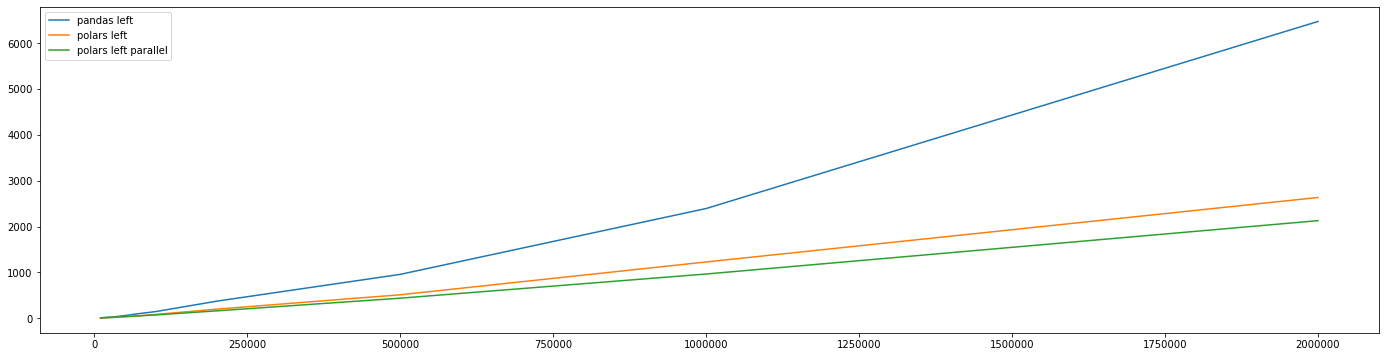

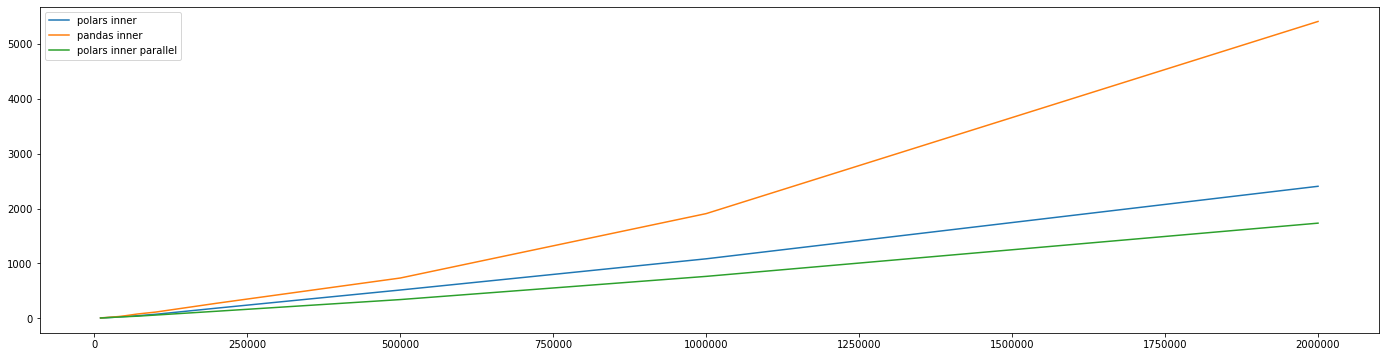

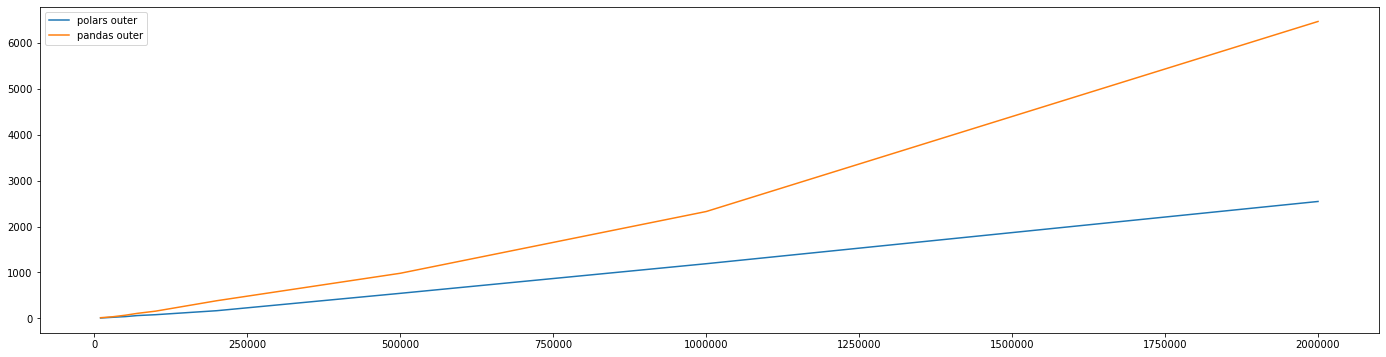

In [110]:
for how in ["inner", "left", "outer"]:
    make_fig(how)
    plt.legend()
    plt.show()

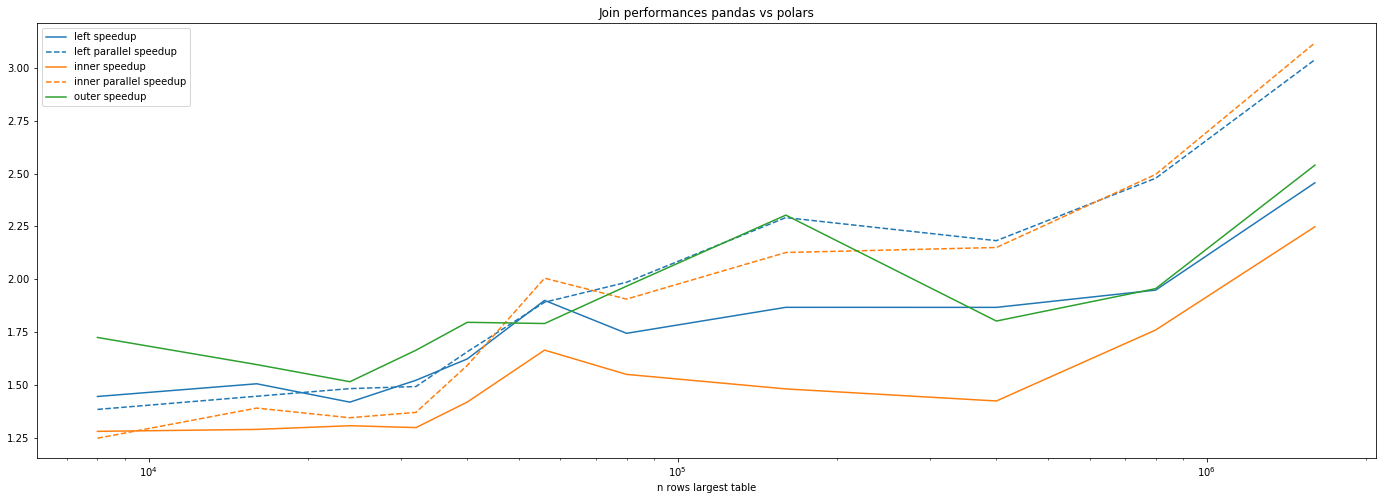

In [106]:
plt.figure(figsize=(24, 8));
plt.title("Join performances pandas vs polars")
x = np.array(n_proxy) * 0.8
plt.plot(x, np.array(left_pd) / np.array(left_pl), label="left speedup", c="C0")
plt.plot(x, np.array(left_pd) / np.array(par_left), label="left parallel speedup", c="C0", ls="--")
plt.plot(x, np.array(inner_pd) / np.array(inner_pl), label="inner speedup", c="C1")
plt.plot(x, np.array(inner_pd) / np.array(par_inner), label="inner parallel speedup", c="C1", ls="--")
plt.plot(x, np.array(outer_pd) / np.array(outer_pl), label="outer speedup", c="C2")
plt.xscale("log")
plt.xlabel("n rows largest table")
plt.legend()

In [48]:
str_groups = np.array(list("0123456789"))
groups = np.arange(10)

size = int(1e7)
g = np.random.choice(groups, size)
sg = np.random.choice(str_groups, size)
v = np.random.randn(size)
df = pd.DataFrame({"groups": g, "values": v, "str": sg})

In [49]:
%%timeit
df.groupby("groups").agg("str").count()

360 ms ± 6.17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [50]:
 >
Terminal Sessions

Kernel Sessions

    10_minutes_to_pypolars.ipynb

df = pl.DataFrame(df.to_dict(orient="list"))

In [53]:
%%timeit
df.groupby("groups").select("str").count()

118 ms ± 1.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
